In [2]:
import numpy as np
# import scipy.stats as spstat
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

dfc = pd.read_table('hongBao__k3.tsv',header=None)
dfc.columns = ['x1','x2']
fig,axs = plt.subplots(1,2,figsize=[18,8])
plt.sca(axs[0])
plt.scatter(dfc.x1,dfc.x2)
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('x1')
plt.ylabel('x2')

plt.sca(axs[1])
xbins = np.linspace(0,100,11)
ybins = np.linspace(0,100,11)
counts = np.histogram2d(x=dfc.x1,y=dfc.x2,bins=(xbins,ybins))[0]
im = plt.pcolormesh(xbins,ybins,counts.T,)
plt.colorbar(im)
plt.xlabel('x1')
plt.ylabel('x2')

L = len(dfc)
m1 = dfc.x1.max()
m2 = dfc.x2.max()
title ='''N={L}
max(x1) = {m1}
max(x2) = {m2}
'''.format(**locals())
plt.suptitle(title)

fig.savefig('hongbao3.png')


# import pymisca.vis_util as 

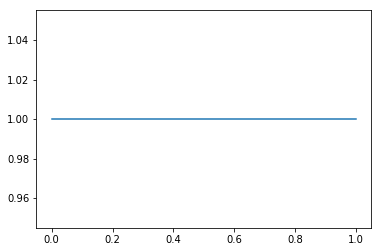

In [16]:
rv = spstat.dirichlet(alpha=[1.,1.])
# rv.rvs(10)
import pymisca.vis_util as pyvis;
xs = np.linspace(0., 1., 30)
ps = rv.pdf( np.stack([xs,1-xs]) )
# ps = rv.pdf(np.concatenate([xs,1-xs],axis=1))
plt.plot(xs,ps)

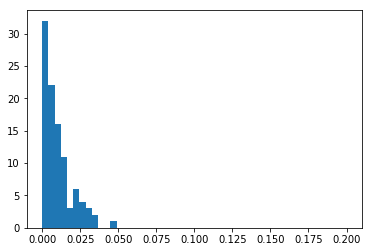

In [62]:
rv = spstat.dirichlet(alpha=[1.0] * 100)
bins = np.linspace(0,0.2,50)
plt.hist(rv.rvs().ravel(),bins);
# rv.prod()
# rv